In [1]:
from phil.deck import Deck, Card
from phil.table import Table

In [2]:
import itertools
import math
import random

import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [3]:
math.comb(52, 2)

1326

In [4]:
DECK = Deck()
TABLE = Table()

In [5]:
def discrete_distplot(samples, ax=None, **kwargs):
    """
    Utility function for plotting the samples as a barplot.
    """
    x, y = np.unique(samples, return_counts=True)
    y = y / sum(y)
    if ax is None:
        ax = plt.gca()

    ax.bar(x, y, **kwargs)
    return ax

In [12]:
str_hand = ["ad", "ah"]
hand = [Card.from_string(s) for s in str_hand]
DECK = Deck()
DECK.remove(*hand)

In [13]:
bins = [opt.max_ranking for opt in TABLE._OPTIONS] + [7462,]

In [14]:
# Expected position at flop:
num_simulations = 100_000
results = []

In [15]:
def gen_rankings(cards):
    all_hands = itertools.combinations(cards, 5)
    for hand in all_hands:
        code = TABLE.encode(hand)
        ranking = TABLE[code]
        yield ranking

In [16]:
ranking_flop = []
ranking_turn = []
ranking_river = []

for _ in tqdm(range(num_simulations)):
    *flop, turn, river, *opponent = random.sample(DECK.cards, 7)
    # Flop:
    all_cards = hand + flop
    ranking_flop.extend(gen_rankings(all_cards))
    all_cards.append(turn)
    ranking_turn.extend(gen_rankings(all_cards))
    all_cards.append(river)
    ranking_river.extend(gen_rankings(all_cards))

  0%|          | 0/100000 [00:00<?, ?it/s]

In [17]:
# hh = [Card.from_string(s) for s in ["ad", "ah", "jh", "8d", "kc"]]

# gen_rankings(hh)

(array([    0.,   235.,   996.,     0.,     0., 10852., 16061., 71856.,
            0.]),
 array([   1,   11,  167,  323, 1600, 1610, 2468, 3326, 6186, 7462]),
 <BarContainer object of 9 artists>)

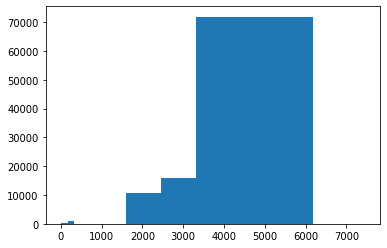

In [18]:
plt.hist(ranking_flop, bins=bins)

In [19]:
np.mean(ranking_river), np.mean(ranking_turn), np.mean(ranking_flop)

(4287.231169047619, 3829.2136633333334, 3055.68088)